**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>
**Disciplina D3TOP/2023 – Tópicos em Ciência de Dados** <br>

**Projeto em Grupo - Parte 2**

#### Sprint 5 - v 2.5 
- iniciando com remoção das linhas com campo 'Texto' nulas, seguindo o resultado do Sprint 3
- pre-processamento com biblioteca nltk nas colunas 'Texto' e 'Ementa' da PLO seguido de neattext
- feature extraction com Wrod2Vec
- treinamento com LogisticRegression
- rodado em PC local (não AWS)


Professor: Samuel Martins (samuel.martins@ifsp.edu.br)<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### Etapa de limpeza e pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [3]:
df = pd.read_csv('PLO 2019 v3a.csv', sep=';')
df.head(3)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,Art. I Fica denominado Praça Sandra Hitomi Ta...,DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SIST...,Carmo Luiz,2019,9,não
1,Art. lº Ficam proibidos a comercialização e o...,PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESP...,Luiz Rossini,2019,13,não
2,Art. 1 0 Poder Executivo municipal deverá disp...,DISPÕE SOBRE O ACESSO ÀS INFORMAÇÕES A RESPEIT...,Luiz Cirilo,2019,1,sim


In [4]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Texto       235
Ementa        0
Vereador    235
Data          0
Nota          0
isUtil        0
dtype: int64

Vamos remover as lihas com campos da coluna 'Texto' e 'Vereador' da PLO sem dados

In [5]:
# Removendo as linhas em branco
df = df.dropna()

In [6]:
df.isna().sum()

Texto       0
Ementa      0
Vereador    0
Data        0
Nota        0
isUtil      0
dtype: int64

In [7]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (99, 6)


In [8]:
df['isUtil'].value_counts()

isUtil
não    82
sim    17
Name: count, dtype: int64

### Processamento de texto: remoção de palavras irrelevantes e stemming
Remoção com bilioteca [nltk](https://www.nltk.org/)

In [9]:
#!pip install --upgrade nltk

In [10]:
# Install the library and functions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Get a list of stopwords from the NLTK library
stop = stopwords.words('portuguese')
# New stopword list
# Add 'Art' and 'Lei' to the stopwords list (not relevant in this study)
sto = stop + ['art', 'lei']
# stopwords = [word for word in stop if word not in excluding]
stopwords = [word for word in sto]

In [15]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [16]:
snow = SnowballStemmer('portuguese')

In [17]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ''
        filtered_sentence=[]
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        for w in word_tokenize(sent):
            # Applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stopwords
            if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords) :
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [18]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [19]:
df.head(5)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,fic denomin prac sandr hitom takahash sistem r...,denomin prac sandr hitom takahash sistem recre...,Carmo Luiz,2019,9,não
1,fic proib comercializ uso espum serpentin prod...,proíb comérci uso produt especif acondicion sp...,Luiz Rossini,2019,13,não
2,pod execut municipal dev disponibiliz mei sit ...,dispõ sobr acess inform respeit obras públic m...,Luiz Cirilo,2019,1,sim
3,fic denomin prac iracem cost prac quart 7.508 ...,denomin prac iracem cost prac públic municípi ...,Carlão do PT,2019,9,não
4,fic alter 14.789 abril pass vigor seguint reda...,alter redaçã 14.789 abril dispõ sobr atend pri...,Paulo Galterio,2019,7,não


### Processamento adicional de Texto usando Neattext
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [20]:
#!pip install neattext

In [21]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    
    return text

In [22]:
# progress bar in pandas
#!pip install tqdm

In [23]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [24]:
# pre-process the training set
df['Texto'] = df['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|█████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 596.75it/s]


In [25]:
# pre-process the training set
df['Ementa'] = df['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1435.69it/s]


In [26]:
df.head(5)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,fic denomin prac sandr hitom takahash sistem r...,denomin prac sandr hitom takahash sistem recre...,Carmo Luiz,2019,9,não
1,fic proib comercializ uso espum serpentin prod...,prob comrci uso produt especif acondicion spra...,Luiz Rossini,2019,13,não
2,pod execut municipal dev disponibiliz mei sit ...,disp sobr acess inform respeit obras pblic mun...,Luiz Cirilo,2019,1,sim
3,fic denomin prac iracem cost prac quart cdig c...,denomin prac iracem cost prac pblic municpi ca...,Carlão do PT,2019,9,não
4,fic alter abril pass vigor seguint reda atend ...,alter reda abril disp sobr atend prioritri mun...,Paulo Galterio,2019,7,não


#### Word Cloud for dataset

Text(0.5, 1.0, 'Word Cloud: Texto de PLOs')

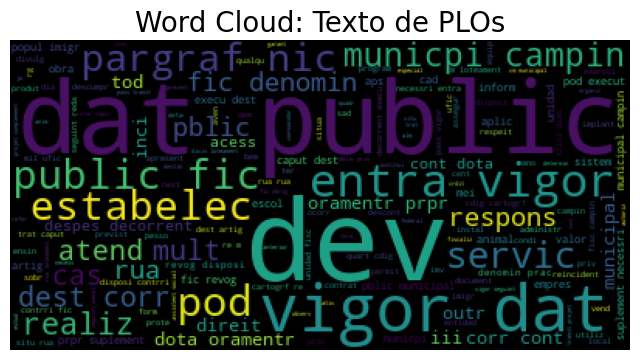

In [27]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud: Texto de PLOs', fontsize=20)

Text(0.5, 1.0, 'Word Cloud: Ementa de PLOs')

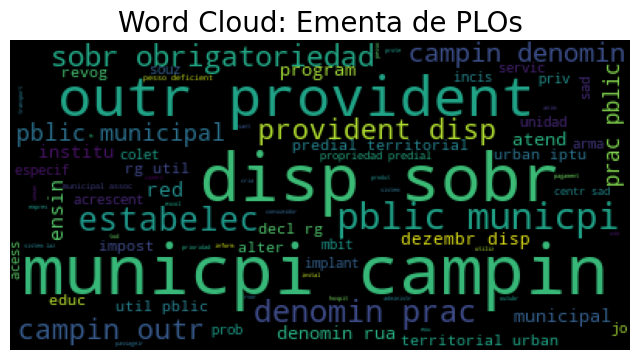

In [28]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Ementa'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud: Ementa de PLOs', fontsize=20)

### Feature Extraction by gensim Word2Vec

In [27]:
!pip install gensim

In [29]:
import gensim.downloader as api

w2v_model = api.load('word2vec-google-news-300')

In [30]:
import numpy as np

def text_feat_extraction_by_word2vec(text: str, w2v_model) -> np.array:
    words = text.split()
    
    words_embedding_list = []
    for word in words:
        # check if the word belongs to the (pre-travocabulary
        if word in w2v_model:
            word_embedding = w2v_model[word]
            
            words_embedding_list.append(word_embedding)

    # do the same but in a pythonic way
    # words_embedding_list = [w2v_model[word] for word in words if word in w2v_model]

    if len(words_embedding_list) == 0:
        return np.zeros(300)

    words_embedding_np = np.array(words_embedding_list)
    
    # compute the average of each feature in the list of embeddings
    # return an averaged vector with 300 averages
    return words_embedding_np.mean(axis=0)

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['isUtil'], random_state=42)

In [32]:
print(f"===> TRAIN\n{df_train['isUtil'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['isUtil'].value_counts() / df_test.shape[0]}")

===> TRAIN
isUtil
não    0.822785
sim    0.177215
Name: count, dtype: float64

===> TEST
isUtil
não    0.85
sim    0.15
Name: count, dtype: float64


In [33]:
df_train

,Texto,Ementa,Vereador,Data,Nota,isUtil
59,fic proib vend comercializ brinqued nacion im...,prob vend brinqued constitu rplic simulacr arm...,Carmo Luiz,2019,13,não
30,fic assegur crianc adolescent cuj pai m respon...,assegur crianc adolescent cuj pai m respons pe...,Carmo Luiz,2019,7,não
62,fic ins tud program municipal popul imigr impl...,institu program municipal popul imigr disp sob...,Carlão do PT,2019,12,não
67,fic obrig tod escol red priv municipal campin ...,disp sobr obrigatoriedad escol red priv munici...,Gustao Petta,2019,12,não
97,fic denomin prac cyro baldin sistem recrei qua...,denomin prac cyro baldin sistem recrei municpi...,Carmo Luiz,2019,9,não
...,...,...,...,...,...,...
14,projet ordinr pass tramit projet complement,institu program rvor qualidad vid municpi camp...,Luiz Rossini,2019,12,não
69,dest dat conform manifest procurador legisl ac...,acrescent a dezembr disp sobr instal funcion e...,Marcelo Silva,2019,11,não
72,fic denomin prac etelvin ram prac quart cdig c...,denomin prac etelvin ram prac pblic municpi ca...,Luiz Rossini,2019,9,não
23,objet implant post colet totens lix toxic supe...,disp sobr obrigatoriedad implant post colet le...,Cidão Santos,2019,6,não


In [34]:
# returns a series with the result
X_train = df_train['Texto'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))
X_test = df_test['Texto'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 363.87it/s]


In [35]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [36]:
# "gambiarra" to convert the Series of np.arrays into a 2D np.array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [37]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (79, 300)
X_test.shape = (20, 300)


In [38]:
# labels
y_train = df_train['isUtil']
y_test = df_test['isUtil']

In [39]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

### Train the models (Train in local PC)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [41]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [42]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         não       0.97      0.91      0.94        65
         sim       0.67      0.86      0.75        14

    accuracy                           0.90        79
   macro avg       0.82      0.88      0.84        79
weighted avg       0.91      0.90      0.90        79



In [43]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Train: {f1_train}')

F1 Train: 0.8432539682539683


In [44]:
from sklearn.metrics import balanced_accuracy_score
balacc_train = balanced_accuracy_score(y_train, y_train_pred)
print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.8824175824175824


### Evaluate the model on the Test Set

In [45]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [46]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         não       0.92      0.71      0.80        17
         sim       0.29      0.67      0.40         3

    accuracy                           0.70        20
   macro avg       0.60      0.69      0.60        20
weighted avg       0.83      0.70      0.74        20



In [47]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.6000000000000001


Word2Vec não melhorou resutados, se comparado com Sprint3.


### Testing with 'Ementa'

In [48]:
# returns a series with the result
X_train = df_train['Ementa'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))
X_test = df_test['Ementa'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))

100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1111.72it/s]


In [49]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [50]:
# "gambiarra" to convert the Series of np.arrays into a 2D np.array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [51]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (79, 300)
X_test.shape = (20, 300)


In [52]:
# labels
y_train = df_train['isUtil']
y_test = df_test['isUtil']

In [53]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

### Train the models (Train in local PC)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [55]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [56]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         não       1.00      0.85      0.92        65
         sim       0.58      1.00      0.74        14

    accuracy                           0.87        79
   macro avg       0.79      0.92      0.83        79
weighted avg       0.93      0.87      0.88        79



In [57]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Train: {f1_train}')

F1 Train: 0.8267543859649122


In [58]:
from sklearn.metrics import balanced_accuracy_score
balacc_train = balanced_accuracy_score(y_train, y_train_pred)
print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9230769230769231


### Evaluate the model on the Test Set

In [59]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [60]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         não       0.86      0.71      0.77        17
         sim       0.17      0.33      0.22         3

    accuracy                           0.65        20
   macro avg       0.51      0.52      0.50        20
weighted avg       0.75      0.65      0.69        20



In [61]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.4982078853046595


Word2Vec não melhorou resutados, se comparado com Sprint3.